<a href="https://colab.research.google.com/github/ricardoricrob76/gerdau/blob/main/GERDAU_Aula_02_SkLearning_Modelos_de_Regress%C3%A3o_Passageiros_com_M%C3%A9tricas_e_Valida%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# GERDAU - Treinamento InCompany
# Autor:  Profº - Ricardo Roberto de Lima - FABWORK
# Ciência de Dados com Python + Pandas, Numpy, SkLearning.
# Machine Learning - Aula 02 - Modelos de Classificação - Regressão Linear e Métricas de Validação.

In [4]:
# Importando a biblioteca pandas para carregar e visualizar a base de dados
import pandas as pd

# Adaptar para o Ambiente da GERDAU.
# import awswrangler as wr

# import boto3
# boto3.setup_default_session(region_name="us-east-2")

In [5]:
# Criar um Objeto do tipo DataFrame - Chamado DF_Viagens
DF_Viagens = pd.read_csv('Passageiros.csv')

# Criar um Objeto do tipo DataFrame no Ambiente Big Data - Gerdau
# DF_Viagens=wr.s3.read_csv('s3://gerdau-analytics/gdata/datascience/Passageiros.csv')

In [6]:
# Visualizando as 10 primeiras linhas do meu Data Frame
DF_Viagens.head(10)

,tempo,nPassageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121
5,1949.416667,135
6,1949.500000,148
7,1949.583333,148
8,1949.666667,136
9,1949.750000,119


In [7]:
# Com as bibliotecas seaborn e matplotlib vamos conseguir gerar gráficos para visualizar a base de dados. 
import seaborn as sns
import matplotlib.pyplot as plt

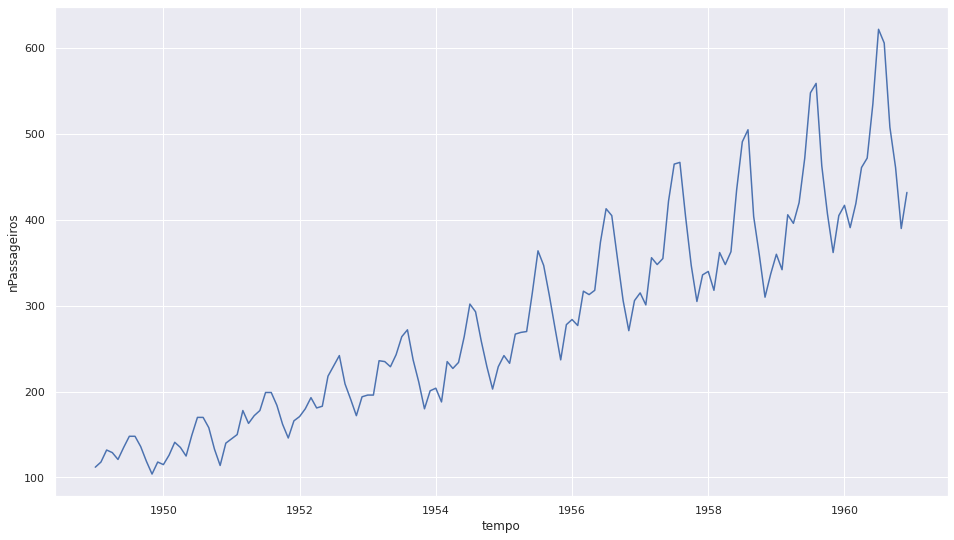

In [8]:
# Criar um gráfico linear de linhas utilizando o Matplotlib + Seaborn
plt.figure(figsize = (16,9))
sns.set(font_scale=1)
sns.lineplot(x="tempo", y="nPassageiros", data=DF_Viagens)

In [9]:
#Seleciona todas as colunas menos a última
Tempo = DF_Viagens.iloc[:,:-1].values

In [10]:
# Seleciona todas somente a coluna que tem o número de passageiros.
nPassageiros = DF_Viagens.iloc[:,1].values

In [11]:
#Podemos separar parte dos dados para treino e teste
from sklearn.model_selection import train_test_split

In [12]:
tempo_treino, tempo_teste, nPassageiros_treino, nPassageiros_teste = train_test_split(Tempo, nPassageiros, 
                                                                         test_size = 0.3)

In [13]:
# Fazendo o Import do Algoritmo de Machine Learning - Regressão Linear Simples
from sklearn import linear_model

In [14]:
# Criando uma instancia do objeto para ser utilizado no modelo de regressão
regressor = linear_model.LinearRegression()

In [15]:
# Realizando o Treinamento do Modelo de Machine Learning.
# Ajustando a reta aos dados de treino
regressor.fit(tempo_treino,nPassageiros_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
# Realizando os Testes com o modelo predito através do comando predict e dos dados de testes / Validação
nPassageiros_predito = regressor.predict(tempo_teste)

In [17]:
print(nPassageiros_predito)

[126.14651675 352.78269473 447.00222939 296.76026871 334.95737736
 151.61125585 271.29552961 179.62246886 121.05356893 421.53749029
 416.44454248 429.17691202 408.80512075 113.4141472  233.09842097
 123.60004284 187.26189059 322.22500781 100.68177765 360.42211646
 210.18015578 431.72338593 266.20258179 373.15448601 118.50709502
 250.92373834 317.13205999 110.86767329 243.28431661 449.5487033
 182.16894277 380.79390774 115.96062111 174.52952104 207.63368187
 413.89806857 426.63043811 436.81633375 309.49263826 312.03911217
 365.51506428 314.58558608 222.91252533 385.88685556]


In [18]:
import numpy as np

In [19]:
#Colocando os dados em um data frame para posteriormente gerar uma figura com o 
# Seaborn
passageiros_predito = pd.DataFrame({'Tempo': np.ndarray.flatten(tempo_teste),
                                    'nPassageiros': nPassageiros_predito,
             })
passageiros_teste = pd.DataFrame({'Tempo': np.ndarray.flatten(tempo_teste),
                                    'nPassageiros': nPassageiros_teste,
             })

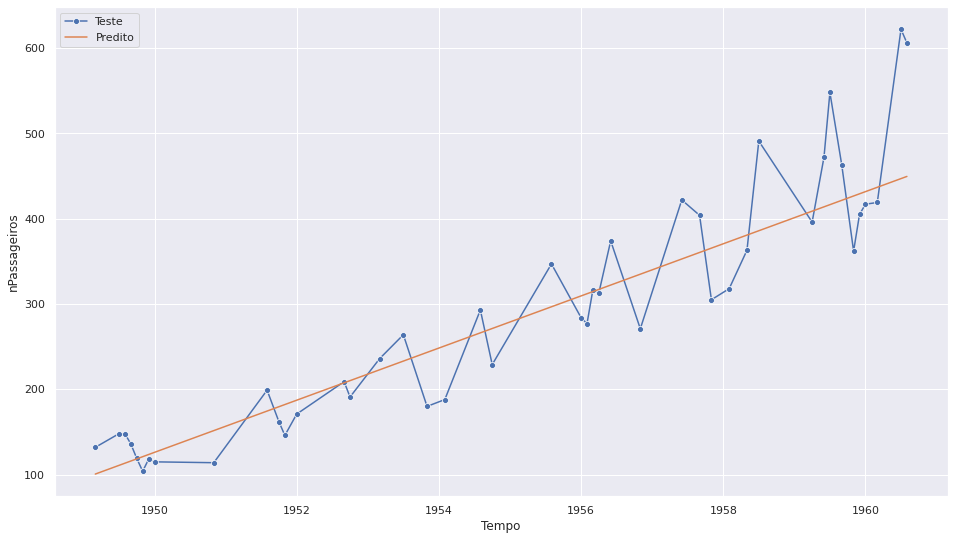

In [20]:
plt.figure(figsize = (16,9))
sns.set(font_scale=1)
sns.lineplot(x="Tempo", y="nPassageiros", data = passageiros_teste,  marker='o', label = "Teste")
sns.lineplot(x='Tempo', y='nPassageiros', data = passageiros_predito, label = "Predito" )

In [1]:
# Trabalhando com Métricas de Avaliação com os Modelos de Regressão.

In [21]:
#Extraindo o coeficiente angular da reta ajustada
regressor.coef_

array([30.55768692])

In [22]:
#Extraindo o coeficiente linear da reta ajustada
regressor.intercept_

-59461.342973531806

In [23]:
from sklearn.metrics import r2_score

In [24]:
# r2_score para a reta ajustada
r2_score(nPassageiros_teste,nPassageiros_predito)

0.8345283042178236

In [25]:
# SVM - SUPORT VECTOR MACHINE

In [29]:
# Import da biblioteca Sklearn SVR
from sklearn.svm import SVR

In [30]:
# Ajusta o modelo de regressão com a máquina de vetor de suporte
regressor_svr = SVR( C=1000000)
regressor_svr.fit(tempo_treino,nPassageiros_treino)

SVR(C=1000000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [31]:
nPassageiros_predito_svr = regressor_svr.predict(tempo_teste)

In [32]:
passageiros_predito_svr = pd.DataFrame({'Tempo': np.ndarray.flatten(tempo_teste),
                                    'nPassageiros': nPassageiros_predito_svr,
             })

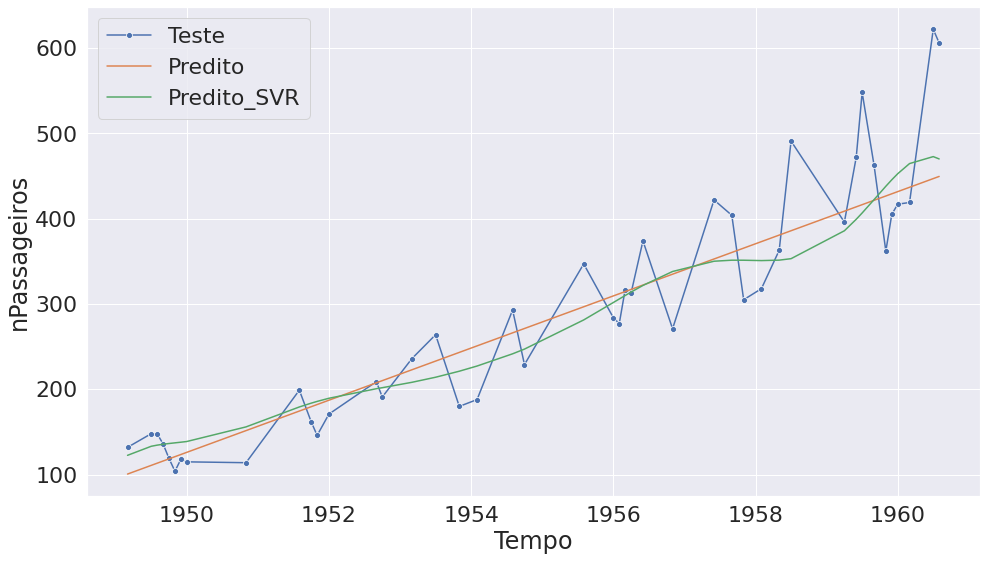

In [33]:
plt.figure(figsize = (16,9))
sns.set(font_scale=2)
sns.lineplot(x="Tempo", y="nPassageiros", data = passageiros_teste,  marker='o', label = "Teste")
sns.lineplot(x='Tempo', y='nPassageiros', data = passageiros_predito, label = "Predito" )
sns.lineplot(x='Tempo', y='nPassageiros', data = passageiros_predito_svr, label = "Predito_SVR" )

In [34]:
# r2_score para a curva ajustada - Seria parecido com a acurácia do modelo de regressão.
r2_score(nPassageiros_teste,nPassageiros_predito_svr)

0.835153476701766